In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud  # Ensure WordCloud is imported
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Ensure necessary NLTK data packages are downloaded
nltk.download('vader_lexicon')
nltk.download('stopwords')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sharm\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sharm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Read the CSV file
df = pd.read_csv('C:/Users/sharm/Downloads/imdb-movies-dataset.csv')


In [3]:
df.describe()


,Year,Duration (min),Rating,Metascore
count,9850.000000,9664.000000,9596.000000,7555.000000
mean,2005.761421,108.809603,6.438610,58.068299
std,18.958005,23.159749,1.051412,17.845240
min,1929.000000,45.000000,1.300000,1.000000
25%,1997.000000,95.000000,5.800000,45.500000
50%,2012.000000,105.000000,6.500000,58.000000
75%,2021.000000,118.000000,7.200000,71.000000
max,2025.000000,746.000000,9.700000,100.000000


In [4]:
df.dtypes

Poster             object
Title              object
Year              float64
Certificate        object
Duration (min)    float64
Genre              object
Rating            float64
Metascore         float64
Director           object
Cast               object
Votes              object
Description        object
Review Count       object
Review Title       object
Review             object
dtype: object

In [5]:
df.head()

,Poster,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title,Review
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","28,744","Solène, a 40-year-old single mom, begins an un...",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","22,248","Many years after the reign of Caesar, a young ...",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","18,401","In 1963 Michigan, business rivals Kellogg's an...",333,not funny,Pretty much the worst criticism you can lay on...
3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...","38,953",A down-and-out stuntman must find the missing ...,384,Everything you needed and more!,Just got out of the Austin premier at SXSW and...
4,https://m.media-amazon.com/images/M/MV5BNTk1MT...,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","32,517","Tashi, a former tennis prodigy turned coach, t...",194,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Poster          10000 non-null  object 
 1   Title           10000 non-null  object 
 2   Year            9850 non-null   float64
 3   Certificate     7370 non-null   object 
 4   Duration (min)  9664 non-null   float64
 5   Genre           9993 non-null   object 
 6   Rating          9596 non-null   float64
 7   Metascore       7555 non-null   float64
 8   Director        9995 non-null   object 
 9   Cast            9961 non-null   object 
 10  Votes           9596 non-null   object 
 11  Description     10000 non-null  object 
 12  Review Count    9999 non-null   object 
 13  Review Title    9483 non-null   object 
 14  Review          9484 non-null   object 
dtypes: float64(4), object(11)
memory usage: 1.1+ MB


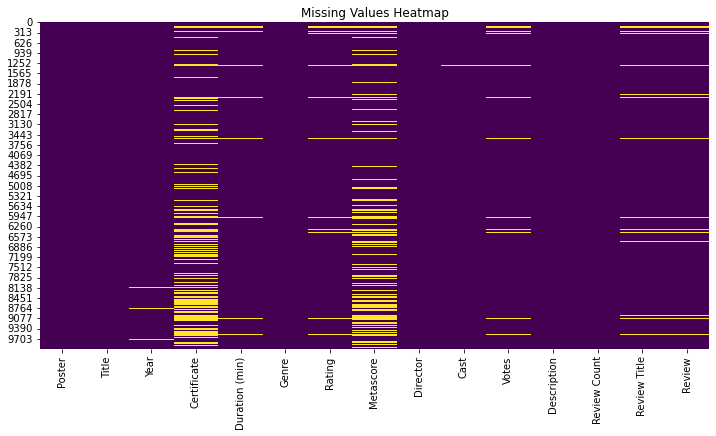

In [7]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


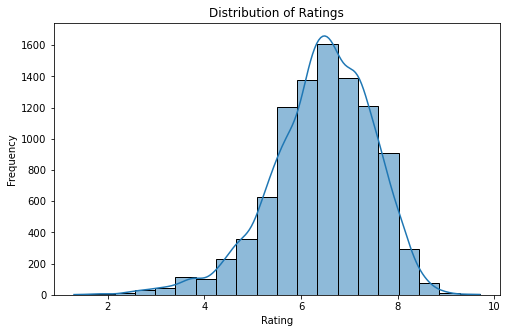

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


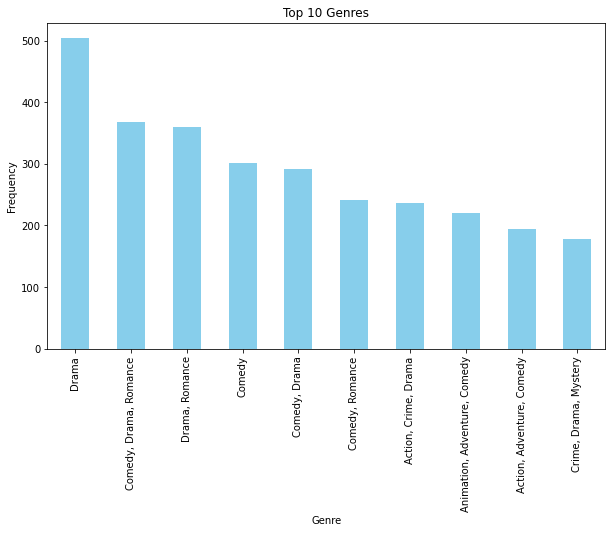

In [9]:
# Get the top 10 genres by frequency
top_genres = df['Genre'].value_counts().head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')

# Display the plot
plt.show()


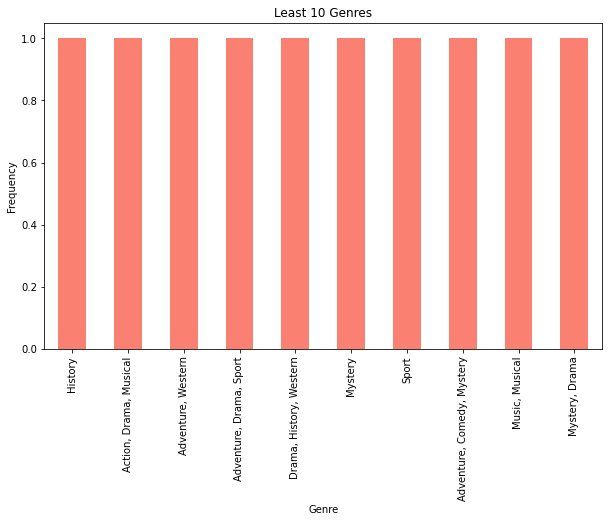

In [10]:
# Get the least 10 genres by frequency
least_genres = df['Genre'].value_counts().tail(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
least_genres.plot(kind='bar', color='salmon')
plt.title('Least 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')

# Display the plot
plt.show()


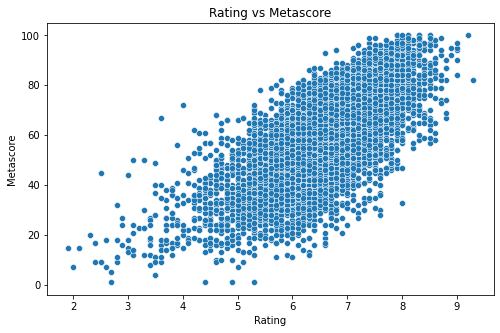

In [11]:
# Relationship Between Rating and Metascore
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Rating', y='Metascore', data=df)
plt.title('Rating vs Metascore')
plt.xlabel('Rating')
plt.ylabel('Metascore')
plt.show()


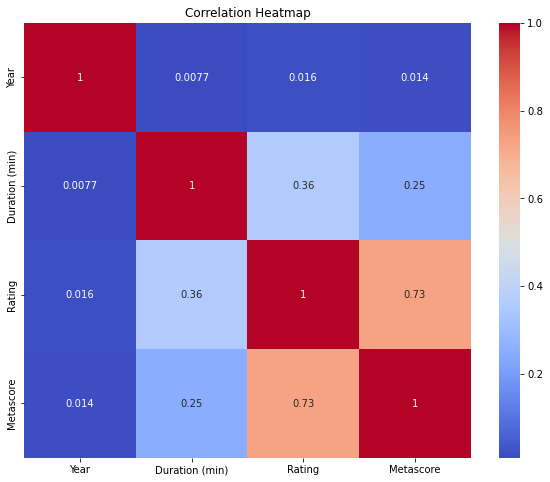

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


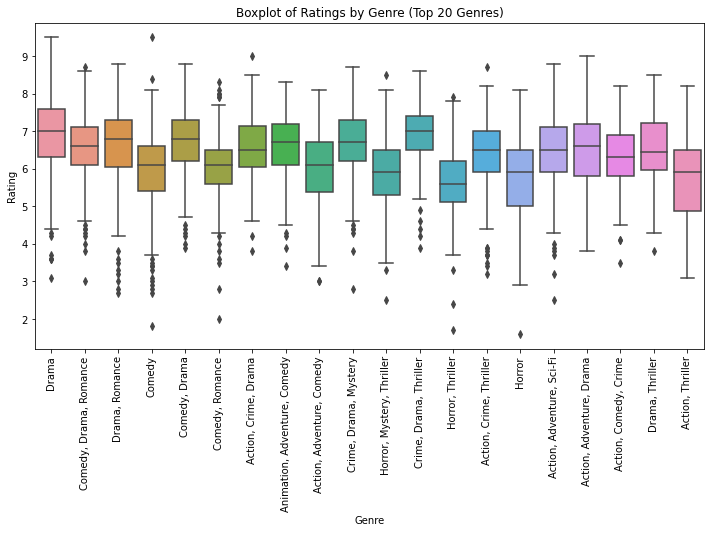

In [13]:
# Top 20 genres by frequency
top_20_genres = df['Genre'].value_counts().head(20).index

# Filter the dataframe to include only the top 20 genres
df_top_20_genres = df[df['Genre'].isin(top_20_genres)]

# Boxplot for Ratings by Genre (Top 20 Genres in Descending Order)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Rating', data=df_top_20_genres, order=top_20_genres)
plt.title('Boxplot of Ratings by Genre (Top 20 Genres)')
plt.xticks(rotation=90)
plt.show()


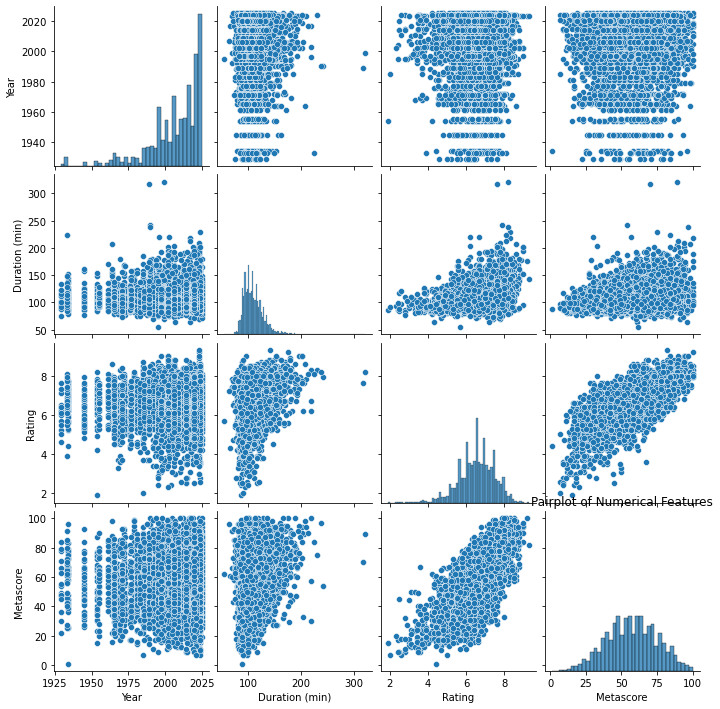

In [14]:
sns.pairplot(df.dropna())
plt.title('Pairplot of Numerical Features')
plt.show()


In [15]:
# Drop rows with missing reviews
df = df.dropna(subset=['Review'])

# Fill NaN values with empty strings
# df['Review'] = df['Review'].fillna('')


In [16]:
df['Review'] = df['Review'].astype(str)


In [17]:
sia = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Review'].apply(lambda review: sia.polarity_scores(review)['compound'])
df['Sentiment_Category'] = pd.cut(df['Sentiment'], bins=[-1, -0.05, 0.05, 1], labels=['Negative', 'Neutral', 'Positive'])


In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9484 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Poster              9484 non-null   object  
 1   Title               9484 non-null   object  
 2   Year                9345 non-null   float64 
 3   Certificate         7295 non-null   object  
 4   Duration (min)      9481 non-null   float64 
 5   Genre               9484 non-null   object  
 6   Rating              9482 non-null   float64 
 7   Metascore           7536 non-null   float64 
 8   Director            9484 non-null   object  
 9   Cast                9481 non-null   object  
 10  Votes               9482 non-null   object  
 11  Description         9484 non-null   object  
 12  Review Count        9484 non-null   object  
 13  Review Title        9483 non-null   object  
 14  Review              9484 non-null   object  
 15  Sentiment           9484 non-null   fl

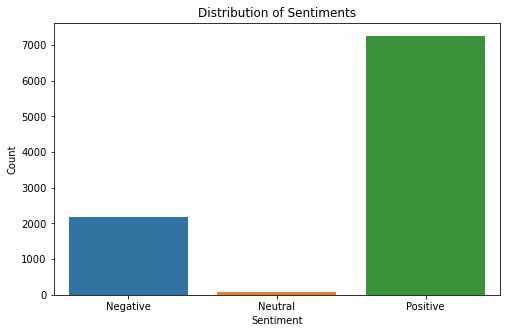

In [19]:
# Distribution of Sentiments
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment_Category', data=df)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [20]:
# Preparing Data for Modeling
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Review'].dropna())
y = df['Sentiment_Category'].dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



In [21]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8186610437532946
Confusion Matrix:
 [[ 187    0  262]
 [   5    1   12]
 [  65    0 1365]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.73      0.42      0.53       449
     Neutral       1.00      0.06      0.11        18
    Positive       0.83      0.95      0.89      1430

    accuracy                           0.82      1897
   macro avg       0.85      0.48      0.51      1897
weighted avg       0.81      0.82      0.80      1897



In [22]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.8355297838692672
Logistic Regression Confusion Matrix:
 [[ 274    0  175]
 [   4    0   14]
 [ 119    0 1311]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

    Negative       0.69      0.61      0.65       449
     Neutral       0.00      0.00      0.00        18
    Positive       0.87      0.92      0.89      1430

    accuracy                           0.84      1897
   macro avg       0.52      0.51      0.51      1897
weighted avg       0.82      0.84      0.83      1897



C:\Users\sharm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sharm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sharm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svc))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svc))


SVM Accuracy: 0.8054823405376911
SVM Confusion Matrix:
 [[ 115    0  334]
 [   2    0   16]
 [  17    0 1413]]
SVM Classification Report:
               precision    recall  f1-score   support

    Negative       0.86      0.26      0.39       449
     Neutral       0.00      0.00      0.00        18
    Positive       0.80      0.99      0.89      1430

    accuracy                           0.81      1897
   macro avg       0.55      0.41      0.43      1897
weighted avg       0.81      0.81      0.76      1897



C:\Users\sharm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sharm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sharm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7712177121771218
Random Forest Confusion Matrix:
 [[  38    0  411]
 [   0    1   17]
 [   6    0 1424]]
Random Forest Classification Report:
               precision    recall  f1-score   support

    Negative       0.86      0.08      0.15       449
     Neutral       1.00      0.06      0.11        18
    Positive       0.77      1.00      0.87      1430

    accuracy                           0.77      1897
   macro avg       0.88      0.38      0.38      1897
weighted avg       0.79      0.77      0.69      1897



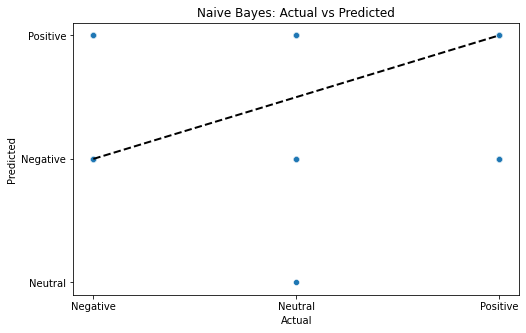

In [25]:
# Plotting actual vs predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, palette='viridis')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Naive Bayes: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


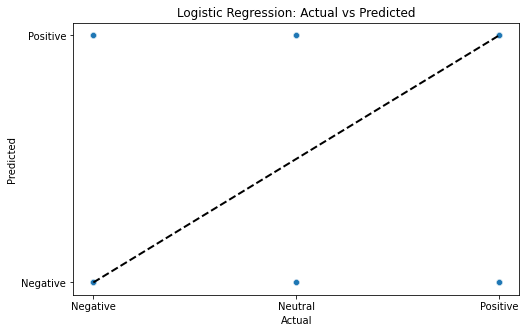

In [26]:
# Plotting actual vs predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_log_reg, palette='viridis')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Logistic Regression: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


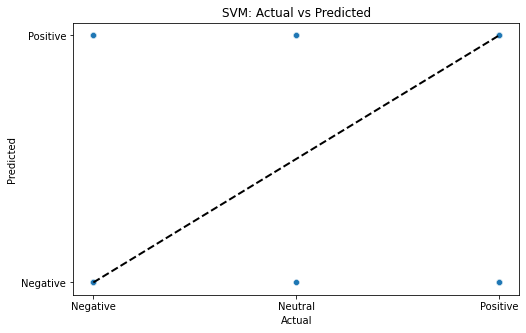

In [27]:
# Plotting actual vs predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_svc, palette='viridis')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('SVM: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


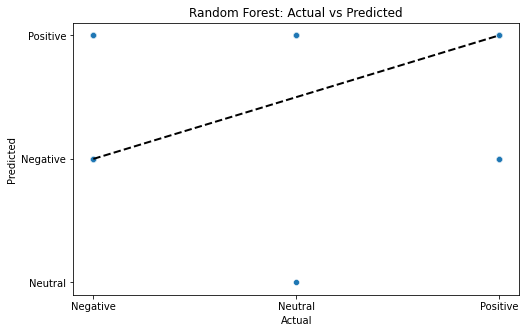

In [28]:
# Plotting actual vs predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_rf, palette='viridis')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


In [29]:
# Calculate accuracy scores for each model
accuracy_scores = {
    'Naive Bayes': accuracy_score(y_test, y_pred),
    'Logistic Regression': accuracy_score(y_test, y_pred_log_reg),
    'SVM': accuracy_score(y_test, y_pred_svc),
    'Random Forest': accuracy_score(y_test, y_pred_rf)
}

# Sort the models based on accuracy scores in descending order
sorted_accuracy = sorted(accuracy_scores.items(), key=lambda x: x[1], reverse=True)

# Display sorted results
for model, accuracy in sorted_accuracy:
    print(f"{model}: {accuracy}")


Logistic Regression: 0.8355297838692672
Naive Bayes: 0.8186610437532946
SVM: 0.8054823405376911
Random Forest: 0.7712177121771218


Conducted comprehensive data analysis and sentiment classification on IMDb movie reviews dataset using Python. Employed data visualization techniques (heatmaps, histograms) to explore movie ratings and genres. Applied NLTK's Vader sentiment analyzer for sentiment scoring and categorized reviews into 'Negative', 'Neutral', and 'Positive'. Implemented machine learning models (Naive Bayes, Logistic Regression, SVM, Random Forest) to predict sentiment categories from textual data, achieving the best accuracy score using Logistic Regression: 83.55% followed by Naive Bayes, SVM and Random Forest.
Evaluated model performance with metrics including accuracy, confusion matrices, and classification reports. This project demonstrates proficiency in data preprocessing, visualization, sentiment analysis, and machine learning model implementation.